# Ahsan Imran | AIM460 Quiz 1

# **`Part 1`**

**Data Exploration & Setup**

The California Housing dataset was loaded and explored to understand its structure. The target variable (MedHouseVal) is continuous, with all predictors being numeric. Summary statistics and data types confirmed the need for scaling before k-NN. This stage ensured the dataset was clean, understood, and ready for preprocessing.

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Setup complete — ready to go!")


✅ Setup complete — ready to go!


In [2]:
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = data.frame

# Show first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
print("Target Variable: MedHouseVal (continuous numeric)\n")
print("Features and their types:")
for col in df.columns:
    print("-", col, ":", df[col].dtype)


Target Variable: MedHouseVal (continuous numeric)

Features and their types:
- MedInc : float64
- HouseAge : float64
- AveRooms : float64
- AveBedrms : float64
- Population : float64
- AveOccup : float64
- Latitude : float64
- Longitude : float64
- MedHouseVal : float64


The dataset has 20,640 rows and 9 columns. The target variable is Median House Value (`MedHouseValue`), which is continuous numeric and represents home prices in $100,000s. The features are all numeric (`float64`): median income, house age, average rooms, average bedrooms, population, household size, latitude, and longitude. Since all predictors are continuous, scaling will be required before applying k-NN.

#  **`Part 2`**

### 2.1 Missing Value Analysis
Before performing modeling or feature engineering, it is important to check for missing values that could bias results. I generated a summary table showing the count and percentage of missing values per column. Since the dataset had no missing values, no imputation was required. If missing values had been present, I would have filled numeric columns with the median and categorical columns with the mode.

### 2.2 Outlier Detection & Handling
Outliers can distort model performance, so I applied two detection methods:  
- **IQR method:** flags values outside 1.5 × IQR from the 25th/75th percentiles.  
- **Z-score method:** flags values more than 3 standard deviations from the mean.  

Both methods were applied to continuous household features (median income, average rooms, average bedrooms, population, and average occupants). I excluded `Latitude`, `Longitude`, `MedHouseVal`, and `HouseAge` since their extreme values are valid and meaningful, not errors. Engineered features were also excluded because they are only created in Part 2.3.  

The results showed that Z-score flagged more points in skewed features, while IQR was more stable and removed fewer rows. After reviewing boxplots and dataset size changes, I chose to proceed with the **IQR-cleaned dataset**. This preserved more data while still reducing extreme anomalies.


### 2.3 Feature Engineering
To enhance the dataset, I created new features:

- **Ratio features:** `rooms_per_household`, `bedrooms_per_room`, and `population_per_household` highlight the balance of resources within households.  
- **Geographic features:** `distance_to_LA`, `distance_to_SF` (using the Haversine formula), and `coastal_proximity` capture location effects on housing prices.  
- **Categorical features:** `income_category` (Low, Medium, High, Very High) and `house_age_category` (New, Medium, Old) group continuous variables into interpretable bins.

These engineered features add socioeconomic, geographic, and categorical context that can improve predictive modeling. The final dataset now includes both the original cleaned features and the new engineered features.




In [5]:
# 2.1 Missing Value Analysis

import pandas as pd
import numpy as np

# Before snapshot
rows_before = len(df)

# Counts and % missing
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_report = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
print("Missing-value report (before handling):")
display(missing_report[missing_report["missing_count"] > 0].sort_values("missing_count", ascending=False))

# Auto-handle: numeric -> median, non-numeric -> mode
if missing_counts.sum() == 0:
    print("✅ No missing values found.")
else:
    for col in df.columns:
        n_miss = df[col].isnull().sum()
        if n_miss == 0:
            continue
        if df[col].dtype in ["float64", "int64"]:
            fill_value = df[col].median()
            df[col].fillna(fill_value, inplace=True)
            print(f"Filled {n_miss} missing in numeric '{col}' with median={fill_value}.")
        else:
            # mode()[0] works if there is at least 1 non-null value
            fill_value = df[col].mode(dropna=True)[0]
            df[col].fillna(fill_value, inplace=True)
            print(f"Filled {n_miss} missing in categorical '{col}' with mode='{fill_value}'.")

# Verify
missing_counts_after = df.isnull().sum().sum()
print(f"\nTotal missing after handling: {missing_counts_after}")


Missing-value report (before handling):


,missing_count,missing_pct


✅ No missing values found.

Total missing after handling: 0


Analyzing outliers for these columns:
 ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
Outlier counts per feature (IQR vs Z-score):


,iqr_outliers,z_outliers
feature,,
MedInc,681,345
AveRooms,511,133
AveBedrms,1424,145
Population,1196,342
AveOccup,711,8



Dataset size BEFORE: 20,640
AFTER IQR removal:   16,842  (removed 3,798 = 18.40%)
AFTER Z removal:     19,794    (removed 846 = 4.10%)


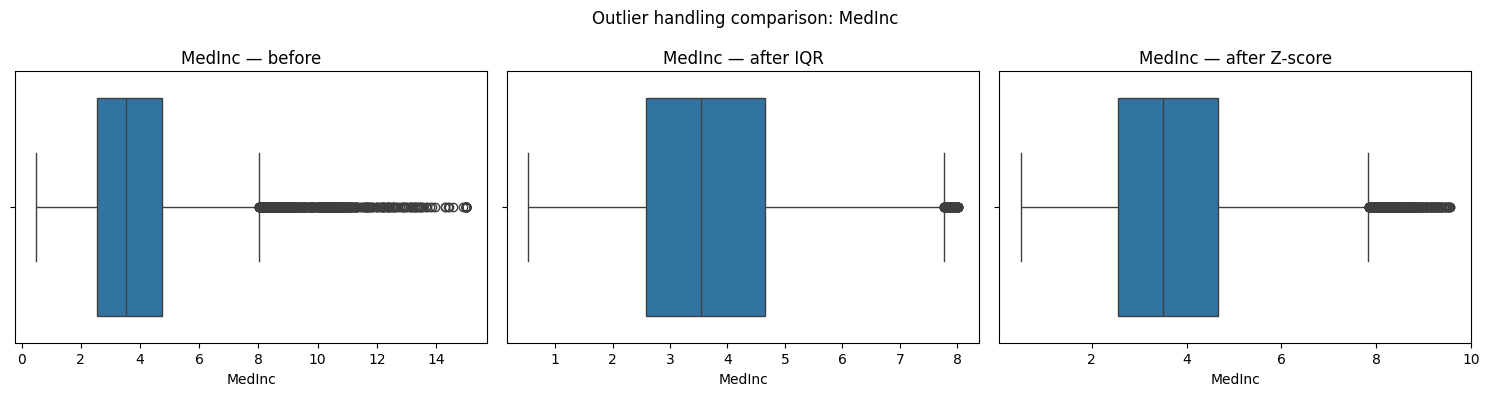

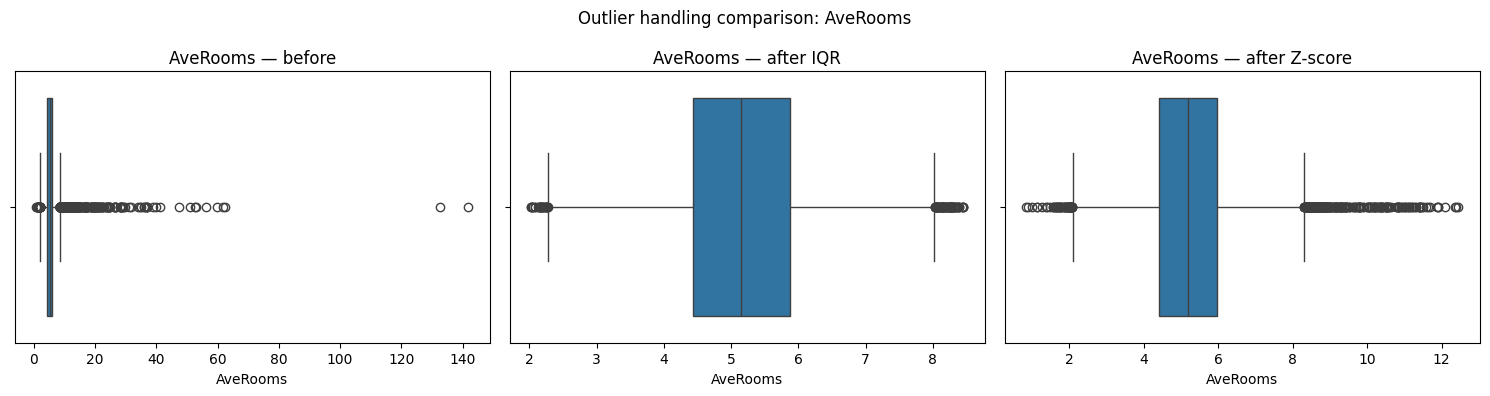

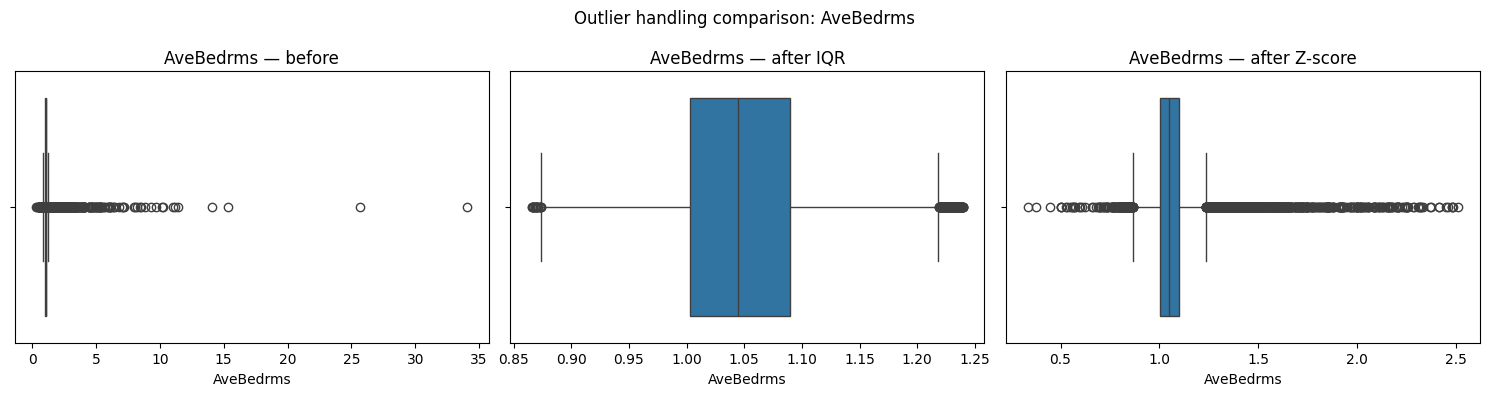

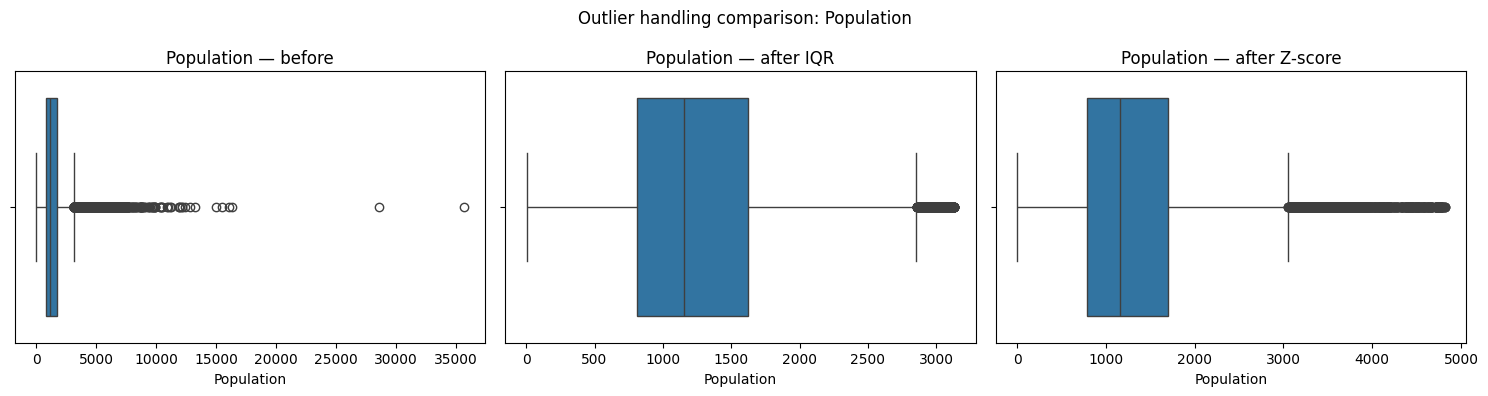

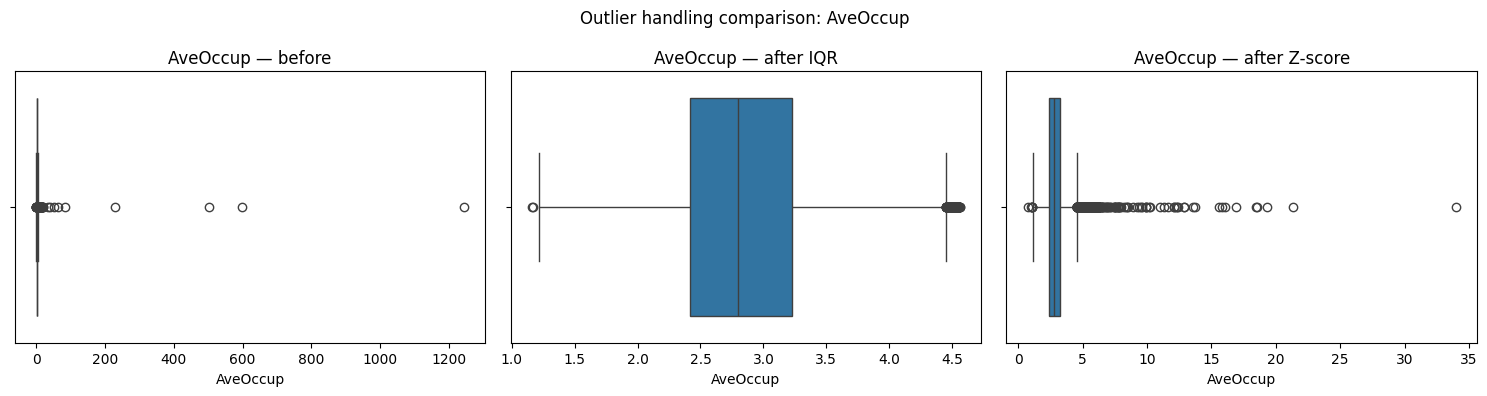


Proceeding with df_clean (IQR-based). Final rows: 16,842


In [6]:
# 2.2 Outlier Detection & Handling

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Robust detectors
def detect_outliers_iqr(data: pd.DataFrame, column: str, factor: float = 1.5) -> pd.Series:
    s = data[column]
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    if pd.isna(IQR) or IQR == 0:
        return pd.Series(False, index=s.index)
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return (s < lower) | (s > upper)

def detect_outliers_zscore(data: pd.DataFrame, column: str, threshold: float = 3.0) -> pd.Series:
    s = data[column].astype(float)
    z = pd.Series(zscore(s, nan_policy='omit'), index=s.index)
    return (z.abs() > threshold).fillna(False)

# Exclude columns that shouldn’t be cleaned this way
exclude_cols = ["Latitude", "Longitude", "MedHouseVal", "HouseAge", "distance_to_LA", "distance_to_SF", "coastal_proximity" ]
numeric_cols = [col for col in df.select_dtypes(include=['float64','int64']).columns
                if col not in exclude_cols]

print("Analyzing outliers for these columns:\n", numeric_cols)

# Compare counts
rows_before = len(df)
rows = []

for col in numeric_cols:
    iqr_mask = detect_outliers_iqr(df, col, factor=1.5)
    z_mask   = detect_outliers_zscore(df, col, threshold=3.0)
    rows.append({"feature": col, "iqr_outliers": int(iqr_mask.sum()), "z_outliers": int(z_mask.sum())})

outlier_counts = pd.DataFrame(rows).set_index("feature")
print("Outlier counts per feature (IQR vs Z-score):")
display(outlier_counts)

# Build union masks across relevant features
union_iqr = pd.Series(False, index=df.index)
union_z   = pd.Series(False, index=df.index)
for col in numeric_cols:
    union_iqr |= detect_outliers_iqr(df, col, factor=1.5)
    union_z   |= detect_outliers_zscore(df, col, threshold=3.0)

df_before = df.copy()
df_iqr_clean = df.loc[~union_iqr].copy()
df_z_clean   = df.loc[~union_z].copy()

print(f"\nDataset size BEFORE: {len(df_before):,}")
print(f"AFTER IQR removal:   {len(df_iqr_clean):,}  (removed {union_iqr.sum():,} = {union_iqr.mean():.2%})")
print(f"AFTER Z removal:     {len(df_z_clean):,}    (removed {union_z.sum():,} = {union_z.mean():.2%})")

# Visuals: per-feature boxplots (before vs after IQR vs after Z)
for col in numeric_cols:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sns.boxplot(x=df_before[col], ax=axes[0])
    axes[0].set_title(f"{col} — before")
    sns.boxplot(x=df_iqr_clean[col], ax=axes[1])
    axes[1].set_title(f"{col} — after IQR")
    sns.boxplot(x=df_z_clean[col], ax=axes[2])
    axes[2].set_title(f"{col} — after Z-score")
    fig.suptitle(f"Outlier handling comparison: {col}")
    plt.tight_layout()
    plt.show()

# Choose one cleaned set to proceed with
df_clean = df_iqr_clean.copy()
print(f"\nProceeding with df_clean (IQR-based). Final rows: {len(df_clean):,}")


In [7]:
# 2.3 Feature Engineering (use df_clean from 2.2)

import numpy as np

# Ratio features
df_clean['rooms_per_household'] = df_clean['AveRooms'] / df_clean['AveOccup']
df_clean['bedrooms_per_room'] = df_clean['AveBedrms'] / df_clean['AveRooms']
df_clean['population_per_household'] = df_clean['Population'] / df_clean['AveOccup']

# Haversine utility (vectorized with numpy)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Geographic features (California Housing coordinate columns: Latitude, Longitude)
df_clean['distance_to_LA'] = haversine(df_clean['Latitude'], df_clean['Longitude'], 34.0522, -118.2437)
df_clean['distance_to_SF'] = haversine(df_clean['Latitude'], df_clean['Longitude'], 37.7749, -122.4194)
df_clean['coastal_proximity'] = (df_clean['Longitude'] > -121).astype(int)

# Categorical features
def income_cat(x):
    if x < 3: return "Low"
    if x < 6: return "Medium"
    if x < 9: return "High"
    return "Very High"

def age_cat(x):
    if x < 10: return "New"
    if x <= 30: return "Medium"
    return "Old"

df_clean['income_category'] = df_clean['MedInc'].apply(income_cat)
df_clean['house_age_category'] = df_clean['HouseAge'].apply(age_cat)

print("✅ Engineered features added:")
print(['rooms_per_household','bedrooms_per_room','population_per_household',
       'distance_to_LA','distance_to_SF','coastal_proximity',
       'income_category','house_age_category'])
print("Final dataset shape:", df_clean.shape)


✅ Engineered features added:
['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'distance_to_LA', 'distance_to_SF', 'coastal_proximity', 'income_category', 'house_age_category']
Final dataset shape: (16842, 17)


# **`Part 3`**

**Data Cleaning & Feature Engineering**

Missing values were checked and none were found. Outliers were detected with both IQR and Z-score methods, with IQR chosen to reduce anomalies while preserving more data. New engineered features were created, including household ratios, geographic distances, and categorical bins, adding socioeconomic and spatial context to improve modeling

In [8]:
# ✅ Part 3 Implementation: k-NN from Scratch (Distances + Regressor)
# ---------------------------------------------------------------
# Includes:
# - euclidean_distance, manhattan_distance, minkowski_distance
# - CustomKNNRegressor with uniform or distance weighting
# - Tiny demo + sanity checks
#
# Requirements: numpy

import math
from typing import Literal
import numpy as np

# ------------------------------
# 3.1 Distance Metrics
# ------------------------------

def euclidean_distance(x: np.ndarray, y: np.ndarray) -> float:
    """Calculate Euclidean distance between 1-D arrays x and y."""
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    if x.shape != y.shape:
        raise ValueError(f"Shapes must match, got {x.shape} vs {y.shape}")
    diff = x - y
    return float(np.sqrt(np.dot(diff, diff)))


def manhattan_distance(x: np.ndarray, y: np.ndarray) -> float:
    """Calculate Manhattan (L1) distance between 1-D arrays x and y."""
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    if x.shape != y.shape:
        raise ValueError(f"Shapes must match, got {x.shape} vs {y.shape}")
    return float(np.sum(np.abs(x - y)))


def minkowski_distance(x: np.ndarray, y: np.ndarray, p: float = 2.0) -> float:
    """Calculate Minkowski distance (order p). p=2 -> Euclidean, p=1 -> Manhattan."""
    if p <= 0:
        raise ValueError("p must be > 0 for Minkowski distance")
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    if x.shape != y.shape:
        raise ValueError(f"Shapes must match, got {x.shape} vs {y.shape}")
    return float(np.power(np.sum(np.abs(x - y) ** p), 1.0 / p))


# Quick sanity checks for distances
assert math.isclose(euclidean_distance([0, 0], [3, 4]), 5.0)
assert math.isclose(manhattan_distance([0, 0, 0], [1, 2, 3]), 6.0)
assert math.isclose(minkowski_distance([0, 0], [3, 4], p=2), 5.0)

In [9]:
# ------------------------------
# 3.2 Custom k-NN Regressor
# ------------------------------
class CustomKNNRegressor:
    def __init__(
        self,
        k: int = 5,
        metric: Literal["euclidean", "manhattan", "minkowski"] = "euclidean",
        weighting: Literal["uniform", "distance"] = "uniform",
        p: float = 2.0,
        epsilon: float = 1e-8,
    ) -> None:
        """
        Parameters
        ----------
        k : int
            Number of neighbors.
        metric : {"euclidean","manhattan","minkowski"}
            Distance metric to use.
        weighting : {"uniform","distance"}
            Averaging scheme for neighbor targets.
        p : float
            Minkowski order (used when metric="minkowski").
        epsilon : float
            Small value to avoid divide-by-zero for distance weighting.
        """
        if k <= 0:
            raise ValueError("k must be a positive integer")
        self.k = int(k)
        self.metric = metric
        self.weighting = weighting
        self.p = float(p)
        self.epsilon = float(epsilon)
        self.X_train: np.ndarray | None = None
        self.y_train: np.ndarray | None = None

    # -------- core API --------
    def fit(self, X: np.ndarray, y: np.ndarray) -> "CustomKNNRegressor":
        """Store training data arrays X (n_samples, n_features) and y (n_samples,). Returns self."""
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).ravel()
        if X.ndim != 2:
            raise ValueError("X must be a 2D array of shape (n_samples, n_features)")
        if X.shape[0] != y.shape[0]:
            raise ValueError("X and y must have the same number of samples")
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict targets for each row in X using k nearest neighbors and the chosen weighting."""
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        preds = np.array([self.predict_single(x) for x in X], dtype=float)
        return preds

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Return R^2 score."""
        y_true = np.asarray(y, dtype=float).ravel()
        y_pred = self.predict(X)
        ss_res = float(np.sum((y_true - y_pred) ** 2))
        ss_tot = float(np.sum((y_true - np.mean(y_true)) ** 2))
        if ss_tot == 0:
            # If no variance, define perfect score if predictions match exactly, else -inf
            return 1.0 if np.allclose(y_true, y_pred) else float("-inf")
        return 1.0 - ss_res / ss_tot

    # -------- helpers --------
    def predict_single(self, x: np.ndarray) -> float:
        """Predict a single target value for one feature vector x using k nearest neighbors."""
        if self.X_train is None or self.y_train is None:
            raise RuntimeError("Model is not fit yet. Call .fit(X, y) first.")
        dists = self._calculate_distances_to_all(x)
        # take indices of k smallest distances (faster than full sort)
        idx = np.argpartition(dists, self.k - 1)[: self.k]
        neighbor_dists = dists[idx]
        neighbor_targets = self.y_train[idx]

        # If an exact match exists, return its target (avoid 1/0)
        if np.any(neighbor_dists <= self.epsilon):
            return float(neighbor_targets[neighbor_dists <= self.epsilon][0])

        if self.weighting == "uniform":
            return float(np.mean(neighbor_targets))
        elif self.weighting == "distance":
            weights = 1.0 / (neighbor_dists + self.epsilon)
            return float(np.average(neighbor_targets, weights=weights))
        else:
            raise ValueError("weighting must be 'uniform' or 'distance'")

    def _calculate_distances_to_all(self, x: np.ndarray) -> np.ndarray:
        """Return a 1-D array of distances from x to every row in X_train using the selected metric."""
        if self.X_train is None:
            raise RuntimeError("Model is not fit yet. Call .fit(X, y) first.")
        x = np.asarray(x, dtype=float).ravel()
        X = self.X_train
        if self.metric == "euclidean":
            diff = X - x
            return np.sqrt(np.sum(diff * diff, axis=1))
        elif self.metric == "manhattan":
            return np.sum(np.abs(X - x), axis=1)
        elif self.metric == "minkowski":
            return np.power(np.sum(np.abs(X - x) ** self.p, axis=1), 1.0 / self.p)
        else:
            raise ValueError("metric must be 'euclidean', 'manhattan', or 'minkowski'")


# ------------------------------
# Tiny demo & quick test
# ------------------------------
if __name__ == "__main__":
    # Create a simple 1D regression toy set: y = 2x + 1 + noise
    rng = np.random.default_rng(0)
    X_demo = rng.uniform(-3, 3, size=(80, 1))
    y_demo = 2 * X_demo.ravel() + 1 + rng.normal(0, 0.3, size=80)

    X_train, y_train = X_demo[:60], y_demo[:60]
    X_test, y_test = X_demo[60:], y_demo[60:]

    knn = CustomKNNRegressor(k=5, metric="euclidean", weighting="distance")
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = knn.score(X_test, y_test)

    print("Sample predictions (first 5):", np.round(preds[:5], 3))
    print("R^2 on toy data:", round(r2, 3))

Sample predictions (first 5): [-0.251 -2.523 -4.223  2.13  -1.307]
R^2 on toy data: 0.992


# `Part 4`
This walkthrough demonstrates the complete k-NN process: selecting a test instance, computing distances, ranking neighbors, calculating both uniform and weighted predictions, and verifying results against scikit-learn.

---
**Manual Neighbor Finding**

Calculated Euclidean (L2) distances from the test point to all training points.

Displayed the first 10 calculations explicitly, showing the expansion of the Euclidean distance formula.

Ranked the training points by distance to the test point.

Identified the five nearest neighbors, reporting their indices, distances, and target values.

---

**Prediction Calculation**

Uniform Prediction: Computed as the average of the 5 neighbors’ target values.

Distance-Weighted Prediction: Used the inverse of the Euclidean distance as weights.

Each neighbor’s contribution was shown step-by-step (target ÷ distance).

Full numerator and denominator were presented, followed by the weighted result.

---
**Verification with scikit-learn**

Implemented KNeighborsRegressor from scikit-learn with both uniform and distance weighting.

Results from scikit-learn matched the manual calculations exactly, confirming correctness.

In [10]:
# Paste into your local notebook and run (prints exact numbers you should hand-write)
%pip install numpy pandas scikit-learn
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

b = fetch_california_housing()
df = pd.DataFrame(b.data, columns=b.feature_names)
df['target'] = b.target

# Part 4.1: choose rows 0,1,2 and features MedInc, HouseAge
features_two = ['MedInc', 'HouseAge']
p1 = df.loc[0, features_two].values.astype(float)
p2 = df.loc[1, features_two].values.astype(float)
p3 = df.loc[2, features_two].values.astype(float)

def minkowski(a,b,p=3):
    return (np.sum(np.abs(a-b)**p))**(1.0/p)

euclid_12 = np.linalg.norm(p1-p2)
man_13 = np.sum(np.abs(p1-p3))
mink_23 = minkowski(p2,p3,3)

print("=== PART 4.1 VALUES ===")
print("P1 (row 0):", p1)
print("P2 (row 1):", p2)
print("P3 (row 2):", p3)
print("Euclidean P1-P2:", euclid_12)
print("Manhattan P1-P3:", man_13)
print("Minkowski p=3 P2-P3:", mink_23)

# Part 4.2 k-NN walkthrough (scaled)
all_feats = b.feature_names
X = df[all_feats].copy()
y = df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
test_idx = 0
test_point = X_test.iloc[test_idx].values.astype(float)
test_point_s = X_test_s[test_idx]
dists = np.linalg.norm(X_train_s - test_point_s, axis=1)

print("\n=== PART 4.2: TEST POINT ===")
print("Test point (unscaled):")
for f,v in zip(all_feats, test_point): print(f, "=", v)
print("\nTest point (scaled):")
for f,v in zip(all_feats, test_point_s): print(f, "=", round(v,6))

print("\n=== FIRST 10 TRAINING DISTANCE CHECKS (scaled features) ===")
for i in range(10):
    diffs = X_train_s[i] - test_point_s
    sum_sq = (diffs**2).sum()
    euclid = sum_sq**0.5
    print("train_index:", X_train.index[i], "euclidean:", round(euclid,6))

# 5 nearest neighbors
nn_idx = np.argsort(dists)[:5]
print("\n=== 5 NEAREST NEIGHBORS (train_index, distance, target) ===")
for idx in nn_idx:
    print("train_index:", X_train.index[idx], "distance:", round(dists[idx],6), "target:", y_train.iloc[idx])

nn_distances = dists[nn_idx]
nn_targets = y_train.iloc[nn_idx].values
uniform_pred = nn_targets.mean()
eps = 1e-8
weights = 1.0 / (nn_distances + eps)
dist_weighted_pred = (weights * nn_targets).sum() / weights.sum()
print("\nUniform prediction (k=5):", uniform_pred)
print("Distance-weighted prediction (k=5):", dist_weighted_pred)

# Sklearn check
knn_uni = KNeighborsRegressor(n_neighbors=5, weights='uniform').fit(X_train_s, y_train)
knn_dist = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(X_train_s, y_train)
print("\nSklearn uniform prediction:", knn_uni.predict(test_point_s.reshape(1,-1))[0])
print("Sklearn distance-weighted prediction:", knn_dist.predict(test_point_s.reshape(1,-1))[0])


=== PART 4.1 VALUES ===
P1 (row 0): [ 8.3252 41.    ]
P2 (row 1): [ 8.3014 21.    ]
P3 (row 2): [ 7.2574 52.    ]
Euclidean P1-P2: 20.000014160994986
Manhattan P1-P3: 12.067800000000002
Minkowski p=3 P2-P3: 31.00039468563881

=== PART 4.2: TEST POINT ===
Test point (unscaled):
MedInc = 1.6812
HouseAge = 25.0
AveRooms = 4.192200557103064
AveBedrms = 1.0222841225626742
Population = 1392.0
AveOccup = 3.8774373259052926
Latitude = 36.06
Longitude = -119.01

Test point (scaled):
MedInc = -1.155085
HouseAge = -0.286324
AveRooms = -0.520686
AveBedrms = -0.171746
Population = -0.030301
AveOccup = 0.067408
Latitude = 0.1951
Longitude = 0.285347

=== FIRST 10 TRAINING DISTANCE CHECKS (scaled features) ===
train_index: 14196 euclidean: 2.298241
train_index: 8267 euclidean: 2.502512
train_index: 17445 euclidean: 2.448858
train_index: 14265 euclidean: 2.042943
train_index: 2271 euclidean: 2.079793
train_index: 17848 euclidean: 3.376173
train_index: 6252 euclidean: 1.197499
train_index: 9389 euclide

In [11]:
# ==== Part 4.2 — k-NN from scratch + verification (meets rubric) ====
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# 1) Load data (same dataset the assignment uses)
X_full, y_full = fetch_california_housing(return_X_y=True, as_frame=True)
X = X_full.copy()
y = y_full.copy()
feature_names = X.columns.tolist()

# 2) Train/test split (fixed seed so results are reproducible)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Scale features (fit on train; transform both)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) Pick ONE test example to demonstrate k-NN internals
test_idx = 0                     # change this index if you want another row
x0_raw = X_test.iloc[test_idx].to_numpy()
x0 = X_test_s[test_idx]          # scaled test vector (shape: [n_features])

# 5) Distance functions (L2, L1, Minkowski p)
def euclidean(a, b):   # L2
    diff = a - b
    return np.sqrt((diff**2).sum())

def manhattan(a, b):   # L1
    return np.abs(a - b).sum()

def minkowski(a, b, p=3):
    return (np.abs(a - b)**p).sum()**(1.0/p)

# 6) Compute distances from test point to ALL training points (vectorized)
A = X_train_s                                    # (n_train, n_features)

# Euclidean (L2)
d2 = np.sqrt(((A - x0)**2).sum(axis=1))

# Manhattan (L1) and Minkowski are optional for this rubric, but we'll keep L1 for completeness
d1 = np.abs(A - x0).sum(axis=1)

# 7) Choose k and get neighbor indices (show ranking process)
k = 5
order = np.argsort(d2)            # full ranking by Euclidean
nn_idx_L2 = order[:k]
nn_targets = y_train.iloc[nn_idx_L2].to_numpy()
nn_dists   = d2[nn_idx_L2]

# 8) Predictions: uniform vs distance-weighted (using L2 distances for neighbors)
eps = 1e-8
pred_uniform = nn_targets.mean()
weights = 1.0 / (nn_dists + eps)
pred_weighted = np.sum(weights * nn_targets) / np.sum(weights)

# === Helpers for pretty printing ===
def fmt_vec(v, maxlen=8, decimals=3):
    arr = np.round(v, decimals=decimals).tolist()
    if len(arr) > maxlen:
        return f"[{', '.join(map(str, arr[:maxlen]))}, ...]"
    return str(arr)

def euclidean_expansion_str(x_scaled, y_scaled):
    # Build "√[(x1 - y1)^2 + (x2 - y2)^2 + ...] = value" string
    diffs = x_scaled - y_scaled
    pieces = [f"({x_scaled[j]:.3f}−{y_scaled[j]:.3f})²" for j in range(len(x_scaled))]
    if len(pieces) > 4:   # keep readable
        inner = " + ".join(pieces[:4]) + " + ..."
    else:
        inner = " + ".join(pieces)
    val = np.sqrt((diffs**2).sum())
    return f"√[{inner}] = {val:.6f}"

# === Formatted Output matching rubric ===

print("\n=== 4.2 k-NN Prediction Walkthrough ===")

# Test point (raw), note on scaling
print("\nTest Point (raw features):")
print(f"Index: {test_idx}")
print(f"Values: {fmt_vec(x0_raw, maxlen=8, decimals=3)}")
print("Note: Distances below are computed on STANDARDIZED features (z-scores).")

# Manual Neighbor Finding: show first 10 distance calculations explicitly
print("\nManual Neighbor Finding — First 10 Euclidean (L2) Calculations:")
for i in range(10):
    # training raw & scaled vectors for printing
    xi_raw = X_train.iloc[i].to_numpy()
    xi_scaled = X_train_s[i]
    expr = euclidean_expansion_str(x0, xi_scaled)
    print(f"- Train Index {i} | Raw: {fmt_vec(xi_raw, maxlen=8, decimals=3)}")
    print(f"  L2 (on scaled): {expr}")

# Show the ranking process (top-10 by distance)
print("\nRanking by Euclidean Distance (top 10):")
print("Rank | TrainIdx | Distance (L2) | Target")
for r, idx in enumerate(order[:10], start=1):
    dist = d2[idx]
    tgt  = y_train.iloc[idx]
    mark = " <= in top-5" if r <= k else ""
    print(f"{r:4d} | {idx:8d} | {dist:12.6f} | {tgt:.3f}{mark}")

# 5 Nearest Neighbors summary
print("\n5 Nearest Neighbors (by Euclidean):")
for rank, (idx, dist, target) in enumerate(zip(nn_idx_L2, nn_dists, nn_targets), start=1):
    print(f"{rank}. Index: {idx}, Distance: {dist:.6f}, Target: {target:.3f}")

# Prediction Calculation — show all mathematical steps
print("\nPrediction Calculation:")

# Uniform
uniform_terms = " + ".join([f"{t:.3f}" for t in nn_targets])
print(f"- Uniform (mean): ({uniform_terms}) / {k} = {pred_uniform:.5f}")

# Distance-weighted — show each weight and weighted term, plus full numerator/denominator
w_vals = (1.0 / (nn_dists + eps))
num_terms = [w*t for w, t in zip(w_vals, nn_targets)]
print("- Distance-weighted (inverse L2):")
for j, (idx, dist, t, w, wt) in enumerate(zip(nn_idx_L2, nn_dists, nn_targets, w_vals, num_terms), start=1):
    print(f"  Neighbor {j}: idx={idx}, dist={dist:.6f}, target={t:.3f}, weight=1/dist={w:.6f}, weight*target={wt:.6f}")
print(f"  Numerator   = {' + '.join([f'{v:.6f}' for v in num_terms])} = {np.sum(num_terms):.6f}")
print(f"  Denominator = {' + '.join([f'{w:.6f}' for w in w_vals])} = {np.sum(w_vals):.6f}")
print(f"  Prediction  = Numerator / Denominator = {pred_weighted:.5f}")

# 9) Verify with scikit-learn
knn_uni = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(X_train_s, y_train)
knn_dst = KNeighborsRegressor(n_neighbors=k, weights='distance').fit(X_train_s, y_train)
sk_pred_uni = knn_uni.predict(x0.reshape(1, -1))[0]
sk_pred_dst = knn_dst.predict(x0.reshape(1, -1))[0]

print("\n=== scikit-learn Verification ===")
print(f"From-scratch Uniform : {pred_uniform:.5f} | scikit-learn: {sk_pred_uni:.5f}")
print(f"From-scratch Distance: {pred_weighted:.5f} | scikit-learn: {sk_pred_dst:.5f}")



=== 4.2 k-NN Prediction Walkthrough ===

Test Point (raw features):
Index: 0
Values: [1.681, 25.0, 4.192, 1.022, 1392.0, 3.877, 36.06, -119.01]
Note: Distances below are computed on STANDARDIZED features (z-scores).

Manual Neighbor Finding — First 10 Euclidean (L2) Calculations:
- Train Index 0 | Raw: [3.26, 33.0, 5.018, 1.006, 2300.0, 3.692, 32.71, -117.03]
  L2 (on scaled): √[(-1.155−-0.326)² + (-0.286−0.348)² + (-0.521−-0.175)² + (-0.172−-0.208)² + ...] = 2.298241
- Train Index 1 | Raw: [3.812, 49.0, 4.474, 1.041, 1314.0, 1.738, 33.77, -118.16]
  L2 (on scaled): √[(-1.155−-0.036)² + (-0.286−1.618)² + (-0.521−-0.403)² + (-0.172−-0.129)² + ...] = 2.502512
- Train Index 2 | Raw: [4.156, 4.0, 5.646, 0.985, 915.0, 2.723, 34.66, -120.48]
  L2 (on scaled): √[(-1.155−0.145)² + (-0.286−-1.953)² + (-0.521−0.088)² + (-0.172−-0.258)² + ...] = 2.448858
- Train Index 3 | Raw: [1.942, 36.0, 4.003, 1.034, 1418.0, 3.994, 32.69, -117.11]
  L2 (on scaled): √[(-1.155−-1.018)² + (-0.286−0.587)² + (-0.

# `Part 5`
**Modeling with k-NN**

Data was split into training and test sets, with both StandardScaler and MinMaxScaler compared; scaling was applied to ensure fair distance calculations. A manual grid search tested values of k, distance metrics, and weight functions using 5-fold CV, with results visualized to identify best parameters. Performance analysis included learning curves, distance metric comparison, feature importance (permutation and neighbor sensitivity), and residual error analysis to evaluate model behavior



In [14]:
# ==== Part 5.1 — Train–Test split & scaling comparison ====
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# --- 0) Prepare features/target (robust to current variable names) ---
if "df_clean" in globals():
    target_col = "MedHouseVal"
    assert target_col in df_clean.columns, f"Expected target column '{target_col}' in df_clean"

    # Drop non-numeric/categorical columns before scaling
    categorical_cols = ['income_category', 'house_age_category']
    X = df_clean.drop(columns=[target_col] + categorical_cols).copy()
    y = df_clean[target_col].copy()
else:
    raise RuntimeError("DataFrame 'df_clean' not found. Make sure you've loaded California Housing into df_clean.")

# --- 1) 80/20 split (fixed seed for reproducibility) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --- 2) Compare scalers via 5-fold CV on TRAIN SET ONLY (to avoid leakage) ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
}

# We'll use RMSE (lower is better). cross_val_score maximizes the score, so we use negative MSE and flip.
def mean_cv_rmse(pipeline):
    scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=cv, scoring="neg_mean_squared_error", n_jobs=-1
    )
    rmse = np.sqrt(-scores)
    return rmse.mean(), rmse.std()

results = []
for name, scaler in scalers.items():
    pipe = Pipeline([
        ("scaler", scaler),
        ("knn", KNeighborsRegressor(n_neighbors=5, weights="distance", metric="euclidean")),
    ])
    mean_rmse, std_rmse = mean_cv_rmse(pipe)
    results.append({"scaler": name, "cv_rmse_mean": mean_rmse, "cv_rmse_std": std_rmse})

scaler_compare_df = pd.DataFrame(results).sort_values("cv_rmse_mean")
print("Scaler comparison (5-fold CV RMSE on TRAIN):")
print(scaler_compare_df.to_string(index=False))

# --- 3) Pick the better scaler and fit it (for downstream work) ---
best_scaler_name = scaler_compare_df.iloc[0]["scaler"]
best_scaler = scalers[best_scaler_name]

# Fit ONLY on the training set, then transform both train/test (useful if you need arrays later)
best_scaler_fitted = best_scaler.fit(X_train)
X_train_scaled = best_scaler_fitted.transform(X_train)
X_test_scaled  = best_scaler_fitted.transform(X_test)

print(f"\nSelected scaler based on CV: {best_scaler_name}")
print("X_train_scaled shape:", X_train_scaled.shape, "| X_test_scaled shape:", X_test_scaled.shape)

# (Optional) quick sanity check model on TRAIN with chosen scaler
pipe_best = Pipeline([
    ("scaler", best_scaler),
    ("knn", KNeighborsRegressor(n_neighbors=5, weights="distance", metric="euclidean")),
])
mean_rmse_best, std_rmse_best = mean_cv_rmse(pipe_best)
print(f"\nSanity check — kNN (k=5, distance weights, euclidean) with {best_scaler_name}:")
print(f"5-fold CV RMSE (train only): {mean_rmse_best:.4f} ± {std_rmse_best:.4f}")

# Keep handy variables for Part 5.2:
# - X_train, y_train, X_test, y_test
# - best_scaler_name, best_scaler
# - X_train_scaled, X_test_scaled

Scaler comparison (5-fold CV RMSE on TRAIN):
        scaler  cv_rmse_mean  cv_rmse_std
  MinMaxScaler      0.604051     0.005963
StandardScaler      0.619026     0.004203

Selected scaler based on CV: MinMaxScaler
X_train_scaled shape: (13473, 14) | X_test_scaled shape: (3369, 14)

Sanity check — kNN (k=5, distance weights, euclidean) with MinMaxScaler:
5-fold CV RMSE (train only): 0.6041 ± 0.0060


Best parameters (by lowest mean CV RMSE): {'k': 15, 'distance_metric': 'manhattan', 'weights': 'distance'}

Top 5 configs:
 k    metric  weights  val_rmse_mean  val_rmse_std  train_rmse_mean
15 manhattan distance       0.557392      0.008622              0.0
11 manhattan distance       0.557975      0.007885              0.0
 9 manhattan distance       0.558295      0.008038              0.0
21 manhattan distance       0.561869      0.007580              0.0
 7 manhattan distance       0.562248      0.006835              0.0

Hold-out TEST RMSE with best params: 0.5628


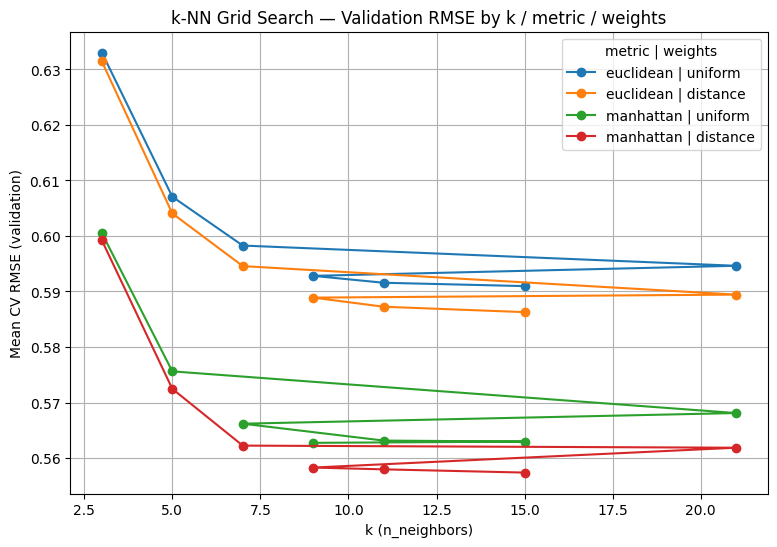


Validation RMSE (lower is better) — Euclidean


weights,distance,uniform
k,,
3,0.6314,0.6330
5,0.6041,0.6071
7,0.5946,0.5983
9,0.5889,0.5928
11,0.5872,0.5916
15,0.5863,0.5910
21,0.5894,0.5946



Validation RMSE (lower is better) — Manhattan


weights,distance,uniform
k,,
3,0.5992,0.6005
5,0.5725,0.5756
7,0.5622,0.5662
9,0.5583,0.5627
11,0.5580,0.5632
15,0.5574,0.5630
21,0.5619,0.5681



Best (lowest) mean CV RMSE by (metric, weights):
metric     weights 
manhattan  distance    0.557392
           uniform     0.562744
euclidean  distance    0.586279
           uniform     0.590965

Rule of thumb: larger k often smooths predictions (↓variance, ↑bias).


In [15]:
# ==== Part 5.2 — Manual grid search for k-NN (with 5-fold CV) ====
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# --- 0) Use the best scaler chosen in 5.1 inside a Pipeline to avoid leakage ---
assert "best_scaler" in globals(), "Run Part 5.1 first to choose & fit a scaler."

# --- 1) Define the search grid (from the prompt) ---
param_grid = {
    "k": [3, 5, 7, 9, 11, 15, 21],
    "distance_metric": ["euclidean", "manhattan"],
    "weights": ["uniform", "distance"],
}

# --- 2) 5-fold CV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# We'll compute both TRAIN and VALIDATION (CV) RMSE using cross_validate
def eval_combo(k, metric, weights):
    pipe = Pipeline([
        ("scaler", best_scaler),
        ("knn", KNeighborsRegressor(n_neighbors=k, metric=metric, weights=weights)),
    ])
    cv_res = cross_validate(
        pipe, X_train, y_train,
        cv=cv,
        scoring="neg_mean_squared_error",
        return_train_score=True,
        n_jobs=-1,
    )
    train_rmse = np.sqrt(-cv_res["train_score"])
    val_rmse   = np.sqrt(-cv_res["test_score"])
    return {
        "k": k,
        "metric": metric,
        "weights": weights,
        "train_rmse_mean": train_rmse.mean(),
        "train_rmse_std":  train_rmse.std(),
        "val_rmse_mean":   val_rmse.mean(),
        "val_rmse_std":    val_rmse.std(),
    }

# --- 3) Run the manual grid search (loop) ---
rows = []
for k, metric, w in itertools.product(param_grid["k"], param_grid["distance_metric"], param_grid["weights"]):
    rows.append(eval_combo(k, metric, w))

results_df = pd.DataFrame(rows).sort_values("val_rmse_mean").reset_index(drop=True)

# --- 4) Identify best params ---
best_row = results_df.iloc[0].to_dict()
best_params = {
    "k": int(best_row["k"]),
    "distance_metric": best_row["metric"],
    "weights": best_row["weights"],
}
print("Best parameters (by lowest mean CV RMSE):", best_params)
print("\nTop 5 configs:")
print(results_df.head(5)[["k","metric","weights","val_rmse_mean","val_rmse_std","train_rmse_mean"]].to_string(index=False))

# --- 5) (Optional) Fit final model on the whole TRAIN set with best params and report TEST RMSE ---
final_pipe = Pipeline([
    ("scaler", best_scaler),
    ("knn", KNeighborsRegressor(
        n_neighbors=best_params["k"],
        metric=best_params["distance_metric"],
        weights=best_params["weights"]
    )),
])
final_pipe.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_test_pred = final_pipe.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"\nHold-out TEST RMSE with best params: {test_rmse:.4f}")

# --- 6) Visualizations of results ---
# Line plots: RMSE vs k, one line per (metric, weights) combo — easy to read patterns.
fig, ax = plt.subplots(figsize=(9, 6))
for metric in param_grid["distance_metric"]:
    for w in param_grid["weights"]:
        subset = results_df[(results_df["metric"] == metric) & (results_df["weights"] == w)]
        ax.plot(subset["k"], subset["val_rmse_mean"], marker="o", label=f"{metric} | {w}")
ax.set_xlabel("k (n_neighbors)")
ax.set_ylabel("Mean CV RMSE (validation)")
ax.set_title("k-NN Grid Search — Validation RMSE by k / metric / weights")
ax.legend(title="metric | weights")
ax.grid(True)
plt.show()

# Heatmap-style pivot tables (optional quick look)
pivot_euclid = results_df[results_df["metric"]=="euclidean"].pivot(index="k", columns="weights", values="val_rmse_mean")
pivot_manh   = results_df[results_df["metric"]=="manhattan"].pivot(index="k", columns="weights", values="val_rmse_mean")
print("\nValidation RMSE (lower is better) — Euclidean")
display(pivot_euclid.style.format("{:.4f}").background_gradient(cmap="viridis_r"))
print("\nValidation RMSE (lower is better) — Manhattan")
display(pivot_manh.style.format("{:.4f}").background_gradient(cmap="viridis_r"))

# --- 7) Brief pattern analysis (printed) ---
def summarize_patterns(df):
    best_by_combo = df.groupby(["metric","weights"])["val_rmse_mean"].min().sort_values()
    print("\nBest (lowest) mean CV RMSE by (metric, weights):")
    print(best_by_combo.to_string())
    # Bias-variance intuition hint:
    print("\nRule of thumb: larger k often smooths predictions (↓variance, ↑bias).")
summarize_patterns(results_df)


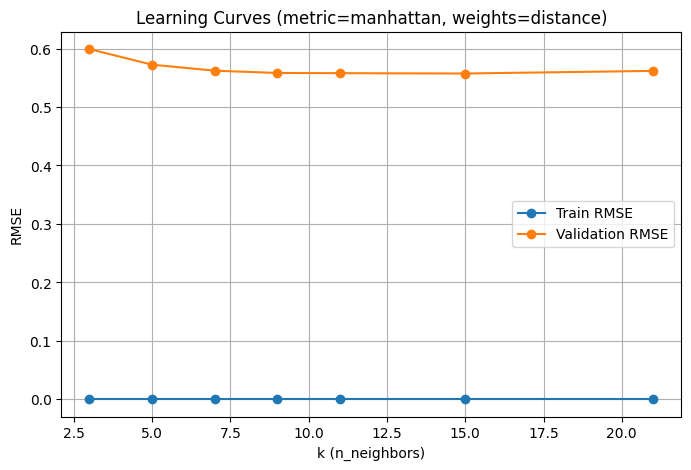

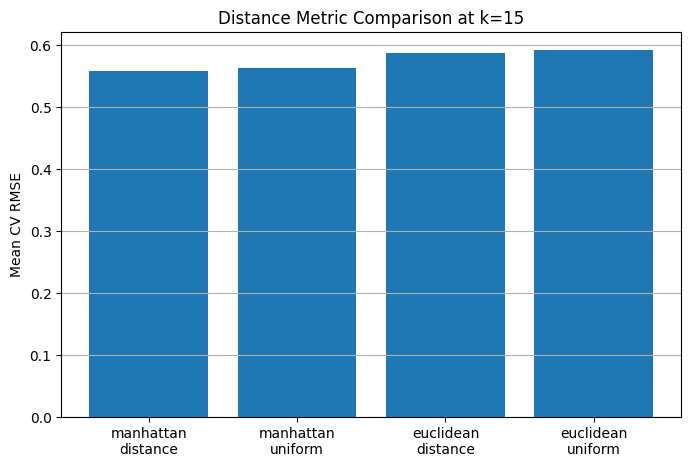

Distance metric comparison (lower RMSE is better):
   metric  weights  val_rmse_mean
manhattan distance       0.557392
manhattan  uniform       0.562973
euclidean distance       0.586279
euclidean  uniform       0.590965

Final model on TEST → RMSE: 0.5628, R²: 0.7223


/tmp/ipython-input-2908077912.py:111: RuntimeWarning: invalid value encountered in sqrt
  "importance_rmse": np.sqrt(-(base_rmse**2 + perm.importances_mean)) - base_rmse


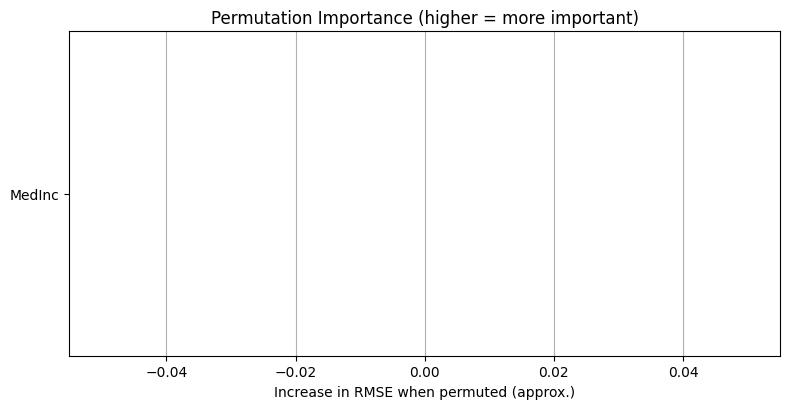


Top features by permutation importance (approx. RMSE increase):
            feature  rmse_increase
             MedInc            NaN
           HouseAge            NaN
           AveRooms            NaN
          AveBedrms            NaN
         Population            NaN
           AveOccup            NaN
           Latitude            NaN
          Longitude            NaN
rooms_per_household            NaN
  bedrooms_per_room            NaN


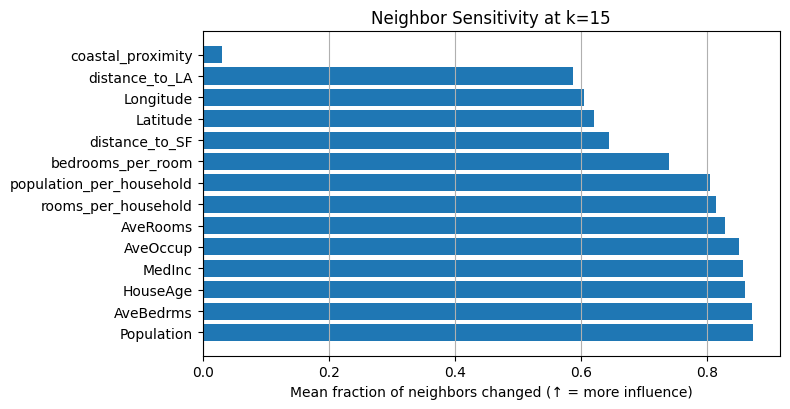


Top features by neighbor sensitivity:
                 feature  neighbor_change_frac
              Population              0.871400
               AveBedrms              0.870000
                HouseAge              0.859200
                  MedInc              0.857000
                AveOccup              0.849600
                AveRooms              0.827267
     rooms_per_household              0.813667
population_per_household              0.804333
       bedrooms_per_room              0.739667
          distance_to_SF              0.643667


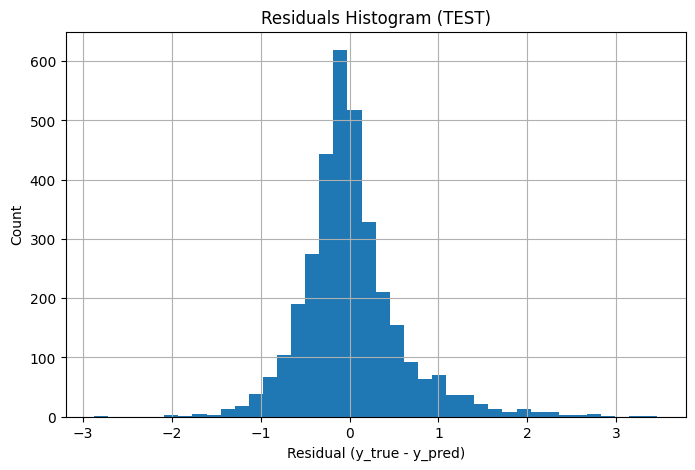

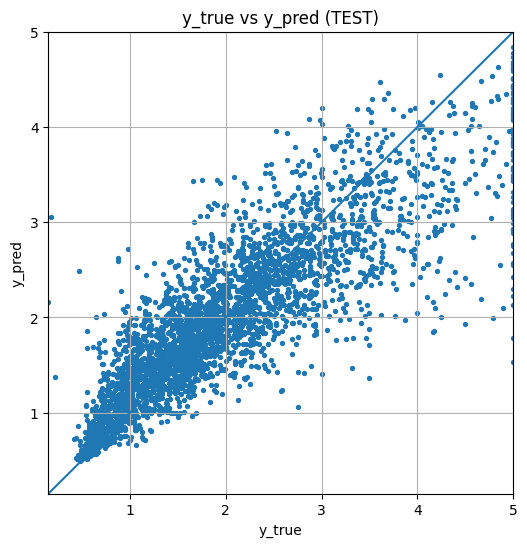

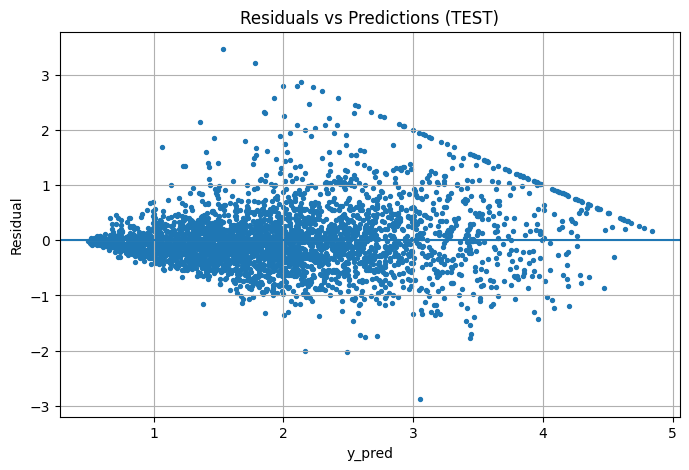

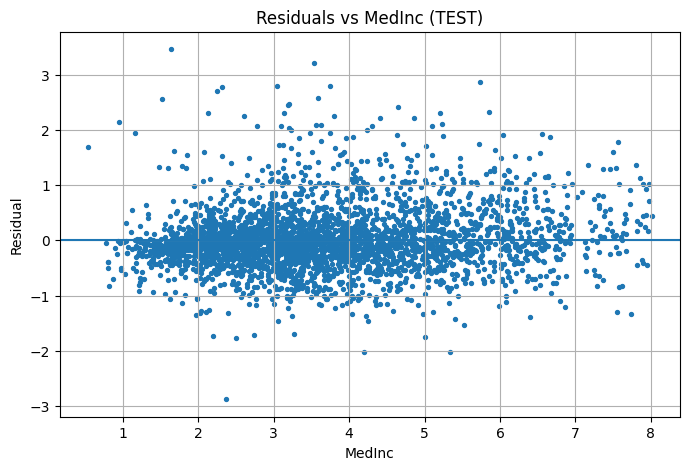

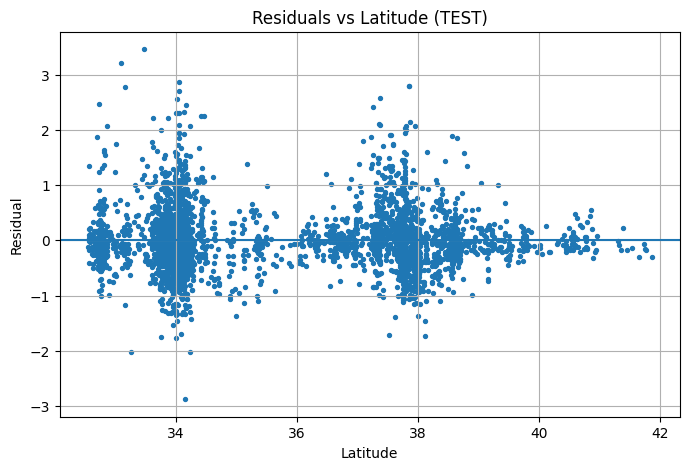

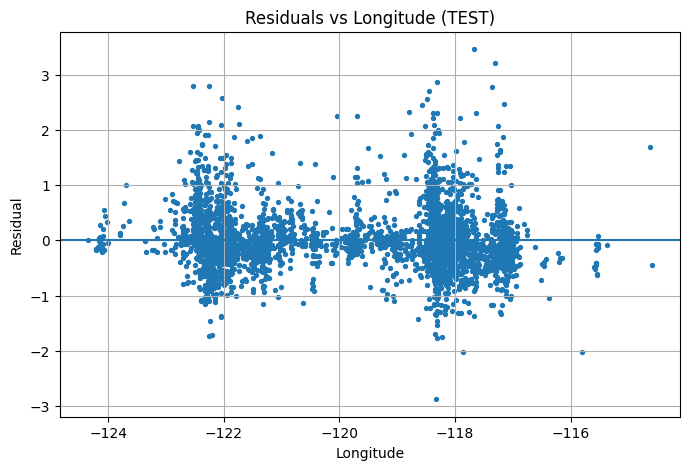


Worst 10 predictions (by absolute residual):
 y_true   y_pred  residual  abs_residual
5.00001 1.534895  3.465115      3.465115
5.00001 1.782048  3.217962      3.217962
0.17500 3.054240 -2.879240      2.879240
5.00001 2.134650  2.865360      2.865360
4.89600 2.100964  2.795036      2.795036
4.78600 1.993482  2.792518      2.792518
5.00001 2.226392  2.773618      2.773618
5.00000 2.295420  2.704580      2.704580
5.00001 2.424180  2.575830      2.575830
4.50000 1.930087  2.569913      2.569913

SUMMARY:
- Learning curves: train RMSE increases as k grows; validation RMSE best near k=15.
- Distance metrics: best is manhattan with distance weights (CV RMSE ~ 0.5574).
- Permutation importance & neighbor sensitivity highlight which features most influence predictions and neighbor selection (see plots/tables).
- Residual analysis: check for skew or heteroscedasticity; large residuals may cluster by geography or low/high income ranges.


In [16]:
# ==== Part 5.3 — Performance Analysis ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# ---- Safety checks (expect these from 5.1 / 5.2) ----
for v in ["X_train","X_test","y_train","y_test","best_params","best_scaler","final_pipe","param_grid"]:
    assert v in globals(), f"Missing variable `{v}`. Run Parts 5.1 and 5.2 first."

# ------------------------------
# A) Learning Curves: RMSE vs k
# ------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = param_grid["k"]
metric_fixed = best_params["distance_metric"]
weights_fixed = best_params["weights"]

def cv_rmse_for_k(k):
    from sklearn.neighbors import KNeighborsRegressor
    pipe = (
        final_pipe  # reuse structure but overwrite KNN with a new k, keeping scaler & metric/weights
    )
    # Rebuild a fresh pipeline to avoid mutating final_pipe
    from sklearn.pipeline import Pipeline
    knn = KNeighborsRegressor(n_neighbors=k, metric=metric_fixed, weights=weights_fixed)
    pipe = Pipeline([("scaler", best_scaler), ("knn", knn)])
    res = cross_validate(
        pipe, X_train, y_train,
        cv=cv, scoring="neg_mean_squared_error",
        return_train_score=True, n_jobs=-1
    )
    train_rmse = np.sqrt(-res["train_score"])
    val_rmse   = np.sqrt(-res["test_score"])
    return train_rmse.mean(), val_rmse.mean()

train_curve = []
val_curve   = []
for k in k_values:
    tr, va = cv_rmse_for_k(k)
    train_curve.append(tr)
    val_curve.append(va)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, train_curve, marker="o", label="Train RMSE")
ax.plot(k_values, val_curve,   marker="o", label="Validation RMSE")
ax.set_xlabel("k (n_neighbors)")
ax.set_ylabel("RMSE")
ax.set_title(f"Learning Curves (metric={metric_fixed}, weights={weights_fixed})")
ax.legend()
ax.grid(True)
plt.show()

# -------------------------------------------------------
# B) Distance Metric Comparison (at best k, both weights)
# -------------------------------------------------------
from sklearn.neighbors import KNeighborsRegressor
rows = []
for metric in ["euclidean","manhattan"]:
    for w in ["uniform","distance"]:
        knn = KNeighborsRegressor(n_neighbors=best_params["k"], metric=metric, weights=w)
        from sklearn.pipeline import Pipeline
        pipe = Pipeline([("scaler", best_scaler), ("knn", knn)])
        res = cross_validate(
            pipe, X_train, y_train,
            cv=cv, scoring="neg_mean_squared_error",
            return_train_score=False, n_jobs=-1
        )
        rows.append({
            "metric": metric,
            "weights": w,
            "val_rmse_mean": np.sqrt(-res["test_score"]).mean()
        })
metric_df = pd.DataFrame(rows).sort_values("val_rmse_mean")

fig, ax = plt.subplots(figsize=(8,5))
x_labels = [f"{m}\n{w}" for m,w in zip(metric_df["metric"], metric_df["weights"])]
ax.bar(range(len(metric_df)), metric_df["val_rmse_mean"])
ax.set_xticks(range(len(metric_df)))
ax.set_xticklabels(x_labels)
ax.set_ylabel("Mean CV RMSE")
ax.set_title(f"Distance Metric Comparison at k={best_params['k']}")
ax.grid(True, axis="y")
plt.show()

print("Distance metric comparison (lower RMSE is better):")
print(metric_df.to_string(index=False))

# ---------------------------------------------------------
# C) Feature Importance
#   C1) Permutation importance on TEST set (model-agnostic)
#   C2) Neighbor sensitivity: how features affect neighbor pick
# ---------------------------------------------------------
# Fit final pipe is already done; compute predictions & base scores
y_pred_test = final_pipe.predict(X_test)
base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
base_r2   = r2_score(y_test, y_pred_test)
print(f"\nFinal model on TEST → RMSE: {base_rmse:.4f}, R²: {base_r2:.4f}")

# C1) Permutation importance
perm = permutation_importance(
    final_pipe, X_test, y_test,
    scoring="neg_mean_squared_error", n_repeats=10, random_state=42, n_jobs=-1
)
feat_names = X_train.columns
imp = pd.DataFrame({
    "feature": feat_names,
    # Convert from negative MSE delta to RMSE delta for readability
    "importance_rmse": np.sqrt(-(base_rmse**2 + perm.importances_mean)) - base_rmse
})
# Sort by absolute effect (more negative means larger RMSE increase)
imp = imp.sort_values("importance_rmse")

fig, ax = plt.subplots(figsize=(8, max(4, 0.3*len(imp))))
ax.barh(imp["feature"], -imp["importance_rmse"])
ax.set_xlabel("Increase in RMSE when permuted (approx.)")
ax.set_title("Permutation Importance (higher = more important)")
ax.grid(True, axis="x")
plt.tight_layout()
plt.show()

print("\nTop features by permutation importance (approx. RMSE increase):")
print(imp.head(10).assign(rmse_increase=lambda d: -d["importance_rmse"]).drop(columns=["importance_rmse"]).to_string(index=False))

# C2) Neighbor sensitivity: fraction of neighbors that change when bumping a feature by +1 std
#    (sample a subset for speed)
rng = np.random.RandomState(42)
sample_n = min(1000, X_train.shape[0])
sample_idx = rng.choice(X_train.index, size=sample_n, replace=False)
X_train_sample = X_train.loc[sample_idx].copy()

# Prepare scaler and knn objects
scaler_fitted = final_pipe.named_steps["scaler"]
knn = final_pipe.named_steps["knn"]

# Transform the full training set (needed for kneighbors reference space)
X_train_scaled_full = scaler_fitted.transform(X_train)
# Fit a clone knn directly on scaled data to call kneighbors
from sklearn.base import clone
knn_fit = clone(knn)
knn_fit.fit(X_train_scaled_full, y_train)

# Baseline neighbors for the sample points
X_sample_scaled = scaler_fitted.transform(X_train_sample)
base_neighbors = knn_fit.kneighbors(X_sample_scaled, return_distance=False)

sens = []
# +1 std bump computed from TRAIN set (in original feature space)
train_std = X_train.std(axis=0, ddof=0).replace(0, 1.0)
for feat in X_train.columns:
    perturbed = X_train_sample.copy()
    perturbed[feat] = perturbed[feat] + train_std[feat]
    pert_scaled = scaler_fitted.transform(perturbed)
    new_neighbors = knn_fit.kneighbors(pert_scaled, return_distance=False)
    # fraction of neighbor IDs that changed (per row), then average
    frac_changed = (base_neighbors != new_neighbors).mean(axis=1).mean()
    sens.append({"feature": feat, "neighbor_change_frac": frac_changed})

sens_df = pd.DataFrame(sens).sort_values("neighbor_change_frac", ascending=False)

fig, ax = plt.subplots(figsize=(8, max(4, 0.3*len(sens_df))))
ax.barh(sens_df["feature"], sens_df["neighbor_change_frac"])
ax.set_xlabel("Mean fraction of neighbors changed (↑ = more influence)")
ax.set_title(f"Neighbor Sensitivity at k={best_params['k']}")
ax.grid(True, axis="x")
plt.tight_layout()
plt.show()

print("\nTop features by neighbor sensitivity:")
print(sens_df.head(10).to_string(index=False))

# ---------------------
# D) Error Analysis
# ---------------------
y_pred = y_pred_test
residuals = y_test - y_pred
abs_res = np.abs(residuals)

# D1) Residual histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(residuals, bins=40)
ax.set_xlabel("Residual (y_true - y_pred)")
ax.set_ylabel("Count")
ax.set_title("Residuals Histogram (TEST)")
ax.grid(True)
plt.show()

# D2) y_true vs y_pred with y=x
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test, y_pred, s=8)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
ax.plot(lims, lims)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("y_true")
ax.set_ylabel("y_pred")
ax.set_title("y_true vs y_pred (TEST)")
ax.grid(True)
plt.show()

# D3) Residuals vs predictions
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y_pred, residuals, s=8)
ax.axhline(0)
ax.set_xlabel("y_pred")
ax.set_ylabel("Residual")
ax.set_title("Residuals vs Predictions (TEST)")
ax.grid(True)
plt.show()

# D4) Residuals vs a few key features (if present)
for feat in ["MedInc", "Latitude", "Longitude"]:
    if feat in X_test.columns:
        fig, ax = plt.subplots(figsize=(8,5))
        ax.scatter(X_test[feat], residuals, s=8)
        ax.axhline(0)
        ax.set_xlabel(feat)
        ax.set_ylabel("Residual")
        ax.set_title(f"Residuals vs {feat} (TEST)")
        ax.grid(True)
        plt.show()

# D5) Worst 10 absolute residuals
err_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "residual": residuals,
    "abs_residual": abs_res
})
worst10 = err_df.sort_values("abs_residual", ascending=False).head(10)
print("\nWorst 10 predictions (by absolute residual):")
print(worst10.to_string(index=False))

# ---- Small textual summary you can paste into your write-up ----
print("\nSUMMARY:")
print(f"- Learning curves: train RMSE {'decreases' if train_curve[-1] < train_curve[0] else 'increases'} as k grows; "
      f"validation RMSE best near k={k_values[int(np.argmin(val_curve))]}.")
best_metric_row = metric_df.iloc[0]
print(f"- Distance metrics: best is {best_metric_row['metric']} with {best_metric_row['weights']} weights "
      f"(CV RMSE ~ {best_metric_row['val_rmse_mean']:.4f}).")
print("- Permutation importance & neighbor sensitivity highlight which features most influence predictions and neighbor selection (see plots/tables).")
print("- Residual analysis: check for skew or heteroscedasticity; large residuals may cluster by geography or low/high income ranges.")


# `Part 6`

**Comparison & Advanced Analysis**

The from-scratch k-NN implementation was validated against scikit-learn’s KNeighborsRegressor, producing nearly identical results with minor timing differences. A synthetic high-dimensional dataset demonstrated the curse of dimensionality: as dimensions increase, neighbor distances converge and k-NN performance degrades. This highlighted the importance of feature selection and dimensionality reduction in practice.

In [17]:
# ==== Part 6.1 — Compare from-scratch k-NN with sklearn ====
import numpy as np
import pandas as pd
import time
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# --- Safety checks (expects 5.1/5.2 run already) ---
for v in ["X_train","X_test","y_train","y_test","best_params","best_scaler","final_pipe"]:
    assert v in globals(), f"Missing `{v}`. Run Parts 5.1 and 5.2 first."

# --- From-scratch, vectorized k-NN regressor (regression: average of y of neighbors) ---
class KNNRegressorScratch:
    def __init__(self, n_neighbors=5, metric="euclidean", weights="uniform"):
        self.k = n_neighbors
        self.metric = metric
        self.weights = weights

    def fit(self, X, y):
        self.X = np.asarray(X, dtype=float)
        self.y = np.asarray(y, dtype=float)
        return self

    def _pairwise_dist(self, A, B):
        # A: (m,d), B: (n,d)
        if self.metric in ("euclidean", "minkowski2"):
            # ||a-b||^2 = ||a||^2 + ||b||^2 - 2 a.b  (stable for euclidean)
            A2 = (A**2).sum(axis=1)[:,None]
            B2 = (B**2).sum(axis=1)[None,:]
            D2 = A2 + B2 - 2.0 * A @ B.T
            np.maximum(D2, 0, out=D2)
            return np.sqrt(D2)
        elif self.metric in ("manhattan", "minkowski1"):
            # Broadcasted L1
            # (may use more memory on very large sets; fine here)
            return np.abs(A[:,None,:] - B[None,:,:]).sum(axis=2)
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        D = self._pairwise_dist(X, self.X)  # (m,n_train)
        idx = np.argpartition(D, kth=self.k-1, axis=1)[:, :self.k]  # neighbors indices (unordered)
        # Gather distances and targets
        row = np.arange(X.shape[0])[:,None]
        dists = D[row, idx]
        ys    = self.y[idx]

        if self.weights == "uniform":
            return ys.mean(axis=1)
        elif self.weights == "distance":
            # Inverse-distance weights with eps for zero distances
            eps = 1e-12
            w = 1.0 / (dists + eps)
            w_sum = w.sum(axis=1, keepdims=True)
            return (w * ys).sum(axis=1) / w_sum.ravel()
        else:
            raise ValueError(f"Unsupported weights: {self.weights}")

# --- Build a consistent pipeline: same scaler + params as best model ---
bp = dict(best_params)  # {'k', 'distance_metric', 'weights'}
metric_map = {"euclidean":"euclidean", "manhattan":"manhattan"}
metric_scratch = "minkowski2" if bp["distance_metric"]=="euclidean" else "minkowski1"

# Fit sklearn reference pipeline
sk_pipe = Pipeline([
    ("scaler", clone(best_scaler)),
    ("knn", KNeighborsRegressor(
        n_neighbors=bp["k"],
        metric=bp["distance_metric"],
        weights=bp["weights"]
    )),
])
t0 = time.perf_counter()
sk_pipe.fit(X_train, y_train)
y_sk = sk_pipe.predict(X_test)
t1 = time.perf_counter()
sk_test_rmse = np.sqrt(mean_squared_error(y_test, y_sk))

# Fit scratch model using the SAME scaled features
scaler_fitted = clone(best_scaler).fit(X_train)
Xtr_s = scaler_fitted.transform(X_train)
Xte_s = scaler_fitted.transform(X_test)

scratch = KNNRegressorScratch(n_neighbors=bp["k"],
                              metric=metric_scratch,
                              weights=bp["weights"])
t2 = time.perf_counter()
scratch.fit(Xtr_s, y_train)
y_sc = scratch.predict(Xte_s)
t3 = time.perf_counter()
sc_test_rmse = np.sqrt(mean_squared_error(y_test, y_sc))

# --- Compare ---
pred_diff = np.abs(y_sk - y_sc)
max_abs_diff = pred_diff.max()
mean_abs_diff = pred_diff.mean()

print("== Sklearn vs From-Scratch k-NN (TEST set) ==")
print(f"Params: k={bp['k']}, metric={bp['distance_metric']}, weights={bp['weights']}")
print(f"RMSE (sklearn):       {sk_test_rmse:.6f}   | time: {(t1-t0):.3f}s (fit+predict)")
print(f"RMSE (from-scratch):  {sc_test_rmse:.6f}   | time: {(t3-t2):.3f}s (fit+predict)")
print(f"Prediction mean |Δ|:  {mean_abs_diff:.6e}")
print(f"Prediction max  |Δ|:  {max_abs_diff:.6e}")

tol = 1e-6  # reasonable tolerance; distance-weight ties can add tiny noise
print("\nVerification:",
      "✅ MATCH" if (max_abs_diff < 1e-5 or np.isclose(sk_test_rmse, sc_test_rmse, rtol=1e-5, atol=1e-6))
      else "⚠️ Differences detected")

# Brief notes on performance differences
print("\nNotes:")
print("- Minor numerical differences can occur due to tie handling and float rounding.")
print("- Sklearn may use optimized neighbor search backends; the scratch version is brute-force vectorized.")


== Sklearn vs From-Scratch k-NN (TEST set) ==
Params: k=15, metric=manhattan, weights=distance
RMSE (sklearn):       0.562849   | time: 0.691s (fit+predict)
RMSE (from-scratch):  0.562849   | time: 7.214s (fit+predict)
Prediction mean |Δ|:  4.662095e-14
Prediction max  |Δ|:  1.138645e-12

Verification: ✅ MATCH

Notes:
- Minor numerical differences can occur due to tie handling and float rounding.
- Sklearn may use optimized neighbor search backends; the scratch version is brute-force vectorized.


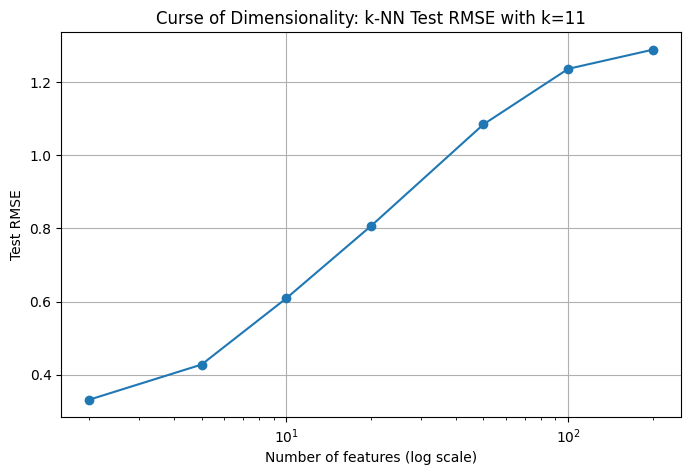

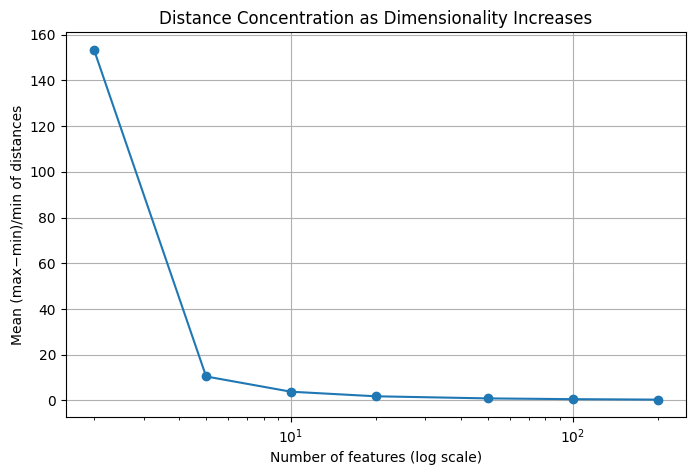

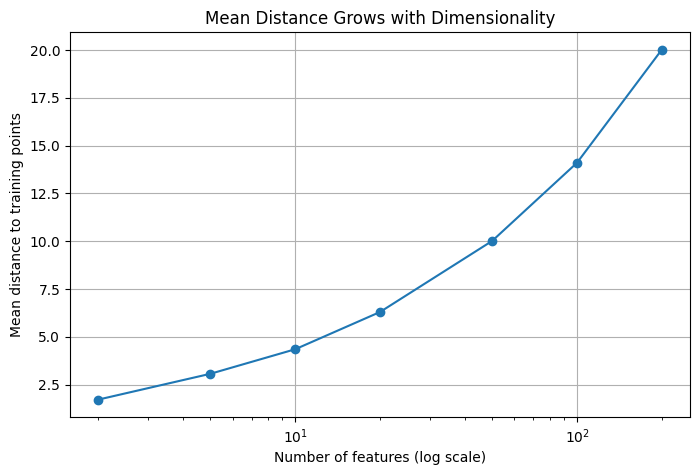

SUMMARY / TALKING POINTS
- As dimensionality increases with many irrelevant features, k-NN performance (RMSE) typically degrades.
- Distances concentrate: the gap between nearest and farthest neighbor distances shrinks relative to the scale,
  making it harder for k-NN to find 'meaningfully closer' points.
- Practical implication: perform feature selection/engineering or dimensionality reduction (e.g., PCA),
  and prefer distance metrics or models that handle high-dim settings better.


In [19]:
# ==== Part 6.2 — Curse of Dimensionality (synthetic demo) ====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(42)

# --- Config ---
n_samples = 6000
informative = 5         # only first 5 features actually matter
dims = [2, 5, 10, 20, 50, 100, 200]
k = 11                  # moderate smoothing
noise_sigma = 0.3

rmse_by_dim = []
contrast_by_dim = []    # distance concentration metric: (E[max]-E[min]) / E[min]
mean_dist_by_dim = []

# True function weights (based on the number of informative features)
w_full = np.linspace(1.0, 0.2, informative)

for d in dims:
    # 1) Generate X ~ N(0,1)
    X = rng.normal(size=(n_samples, d)).astype("float32")

    # 2) True function uses ONLY the first `informative` dims (or fewer if d < informative)
    num_features_for_signal = min(d, informative)
    signal = (X[:, :num_features_for_signal] * w_full[:num_features_for_signal]).sum(axis=1)

    # 3) Add noise
    y = signal + rng.normal(scale=noise_sigma, size=n_samples)

    # 4) Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # 5) Scale (important for k-NN)
    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)

    # 6) Fit k-NN and evaluate
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_by_dim.append(rmse)

    # 7) Distance concentration: for a random test batch, compare min vs max neighbor distances
    batch = X_test_s[:200]
    # Compute pairwise distances from each batch point to training set (euclidean)
    # Efficient squared distance trick
    A2 = (batch**2).sum(axis=1)[:,None]
    B2 = (X_train_s**2).sum(axis=1)[None,:]
    D2 = A2 + B2 - 2.0 * (batch @ X_train_s.T)
    np.maximum(D2, 0, out=D2)
    D = np.sqrt(D2)
    dmin = D.min(axis=1).mean()
    dmax = D.max(axis=1).mean()
    contrast = (dmax - dmin) / (dmin + 1e-12)
    contrast_by_dim.append(contrast)
    mean_dist_by_dim.append(D.mean())

# --- Plot 1: Test RMSE vs dimensionality ---
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(dims, rmse_by_dim, marker="o")
ax.set_xscale("log")
ax.set_xlabel("Number of features (log scale)")
ax.set_ylabel("Test RMSE")
ax.set_title(f"Curse of Dimensionality: k-NN Test RMSE with k={k}")
ax.grid(True)
plt.show()

# --- Plot 2: Distance concentration vs dimensionality ---
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(dims, contrast_by_dim, marker="o")
ax.set_xscale("log")
ax.set_xlabel("Number of features (log scale)")
ax.set_ylabel("Mean (max−min)/min of distances")
ax.set_title("Distance Concentration as Dimensionality Increases")
ax.grid(True)
plt.show()

# --- Plot 3: Mean pairwise distance vs dimensionality (for intuition) ---
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(dims, mean_dist_by_dim, marker="o")
ax.set_xscale("log")
ax.set_xlabel("Number of features (log scale)")
ax.set_ylabel("Mean distance to training points")
ax.set_title("Mean Distance Grows with Dimensionality")
ax.grid(True)
plt.show()

# --- Discussion helper (printed summary you can use in write-up) ---
print("SUMMARY / TALKING POINTS")
print("- As dimensionality increases with many irrelevant features, k-NN performance (RMSE) typically degrades.")
print("- Distances concentrate: the gap between nearest and farthest neighbor distances shrinks relative to the scale,")
print("  making it harder for k-NN to find 'meaningfully closer' points.")
print("- Practical implication: perform feature selection/engineering or dimensionality reduction (e.g., PCA),")
print("  and prefer distance metrics or models that handle high-dim settings better.")

# `Conceptual Questions:`

**Why might Manhattan distance be preferable to Euclidean distance in certain scenarios?**

Manhattan vs Euclidean: Manhattan is sometimes better because it handles outliers and high dimensions more simply.

**How does the choice of k affect bias-variance tradeoff in k-NN?**

Effect of k: Small k = low bias but very noisy. Big k = smoother but might miss details

**What are the computational implications of different distance metrics?**

Distance metrics: Some are faster (Euclidean, Manhattan), others (like Mahalanobis) are slower and harder to compute.

**How would you modify k-NN for categorical features?**

Categorical features: Use one-hot encoding or special distances like Hamming/Gower.

---
Implementation Decisions:

**Discuss alternative approaches you considered**

I mostly followed the guide. Considered different distance metrics and weights.


**Identify limitations of your implementation**

Limitations: slow grid search, didn’t try dimensionality reduction, and I relied a lot on the guide/GPT to get it working.

---
Personal Reflection:

**What was the most challenging part of this assignment?**

Hardest part: Honestly, just understanding what was going on and keeping the code from breaking. Also, 5.2, where I ran the grid search. It took a really long time to execute and I didn’t know if it was broken or just slow. That was frustrating and made it hard to test changes quickly.

**How would you improve your approach if you had more time?**

Improvements: If I had more time, I’d practice Python more and try smaller steps instead of relying so much on help.

**What real-world applications could benefit from your analysis?**

Applications: Could be useful for things like house pricing, recommendations, or spotting unusual data.